# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = query_url + city
    response = requests.get(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s \t| %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append(
            {
                "City": city, 
                "Lat": city_lat, 
                "Lng": city_lng, 
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            }
        )

    # If an error is experienced, skip the city
    except:
        print(f"City not found. Skipping...\t| {city}")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 	| waitangi
Processing Record 2 of Set 1 	| brookings
Processing Record 3 of Set 1 	| adamstown
Processing Record 4 of Set 1 	| taiohae
City not found. Skipping...	| taiohae
Processing Record 5 of Set 1 	| ribeira grande
Processing Record 6 of Set 1 	| thompson
Processing Record 7 of Set 1 	| georgetown
Processing Record 8 of Set 1 	| tazovsky
Processing Record 9 of Set 1 	| margaret river
Processing Record 10 of Set 1 	| nuku'alofa
Processing Record 11 of Set 1 	| itoman
Processing Record 12 of Set 1 	| port-aux-francais
Processing Record 13 of Set 1 	| novodvinsk
Processing Record 14 of Set 1 	| salinopolis
Processing Record 15 of Set 1 	| west island
Processing Record 16 of Set 1 	| blackmans bay
Processing Record 17 of Set 1 	| dudinka
Processing Record 18 of Set 1 	| yellowknife
Processing Record 19 of Set 1 	| watseka
Processing Record 20 of Set 1 	| longyearbyen
Processing Record 21 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,11.01,75,60,2.68,NZ,1697147687
1,brookings,44.3114,-96.7984,7.28,97,100,12.35,US,1697147544
2,adamstown,-25.0660,-130.1015,20.91,69,98,5.65,PN,1697146870
3,ribeira grande,38.5167,-28.7000,19.32,84,67,1.79,PT,1697147687
4,thompson,55.7435,-97.8558,13.09,58,40,1.54,CA,1697147482


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.01,75,60,2.68,NZ,1697147687
1,brookings,44.3114,-96.7984,7.28,97,100,12.35,US,1697147544
2,adamstown,-25.0660,-130.1015,20.91,69,98,5.65,PN,1697146870
3,ribeira grande,38.5167,-28.7000,19.32,84,67,1.79,PT,1697147687
4,thompson,55.7435,-97.8558,13.09,58,40,1.54,CA,1697147482


### Create the Scatter Plots Requested


In [8]:
# Define function to build these scatterplots
def this_scatter(x_col, y_col, df, xlabel, ylabel, title, ax):
    
    ax.scatter(
        x=x_col,
        y=y_col,
        data=df,
        alpha=0.75,
        edgecolors='black',
        label='Data points'
    )


    # Incorporate the other graph properties
    ax.set_xlabel(xlabel, fontdict={'weight': 700})
    ax.set_ylabel(ylabel, fontdict={'weight': 700})
    # how to get today's date: https://stackoverflow.com/a/60234593
    ax.set_title(
    f"{title} ({time.strftime('%Y-%m-%d')})",
    fontdict={'weight': 700, 'size': 14}
    )

    ax.grid(True)
    ax.set_axisbelow(True)
    plt.tight_layout()
    
    



#### Latitude Vs. Temperature

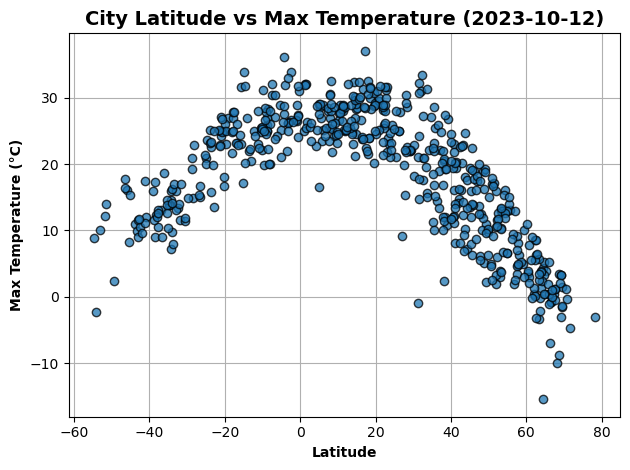

In [9]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots()

this_scatter(
    x_col='Lat',
    y_col='Max Temp',
    df=city_data_df,
    xlabel='Latitude',
    ylabel='Max Temperature (°C)',
    title='City Latitude vs Max Temperature',
    ax=ax
)

# Save the figure
fig.savefig('output_data/Fig01.png')

# Show plot
plt.show()


#### Latitude Vs. Humidity

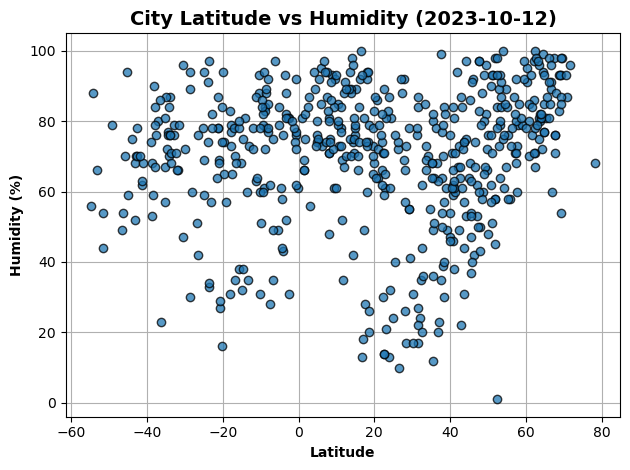

In [10]:
# Build the scatter plots for latitude vs. humidity
fig, ax = plt.subplots()

this_scatter(
    x_col='Lat',
    y_col='Humidity',
    df=city_data_df,
    xlabel='Latitude',
    ylabel='Humidity (%)',
    title='City Latitude vs Humidity',
    ax=ax
)

# Save the figure
fig.savefig('output_data/Fig02.png')

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

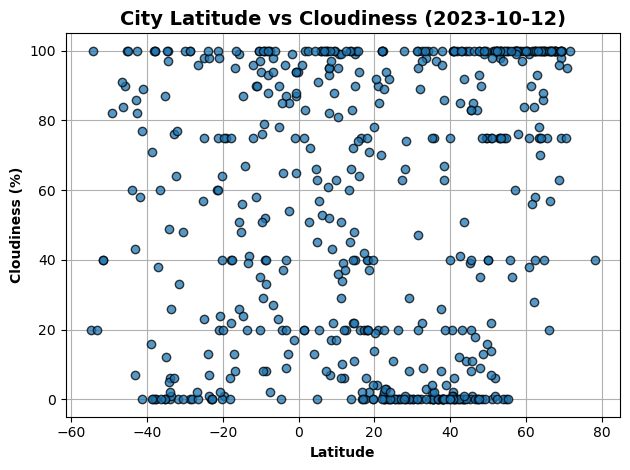

In [11]:
# Build the scatter plots for latitude vs. cloudiness
fig, ax = plt.subplots()

this_scatter(
    x_col='Lat',
    y_col='Cloudiness',
    df=city_data_df,
    xlabel='Latitude',
    ylabel='Cloudiness (%)',
    title='City Latitude vs Cloudiness',
    ax=ax
)

# Save the figure
fig.savefig('output_data/Fig03.png')

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

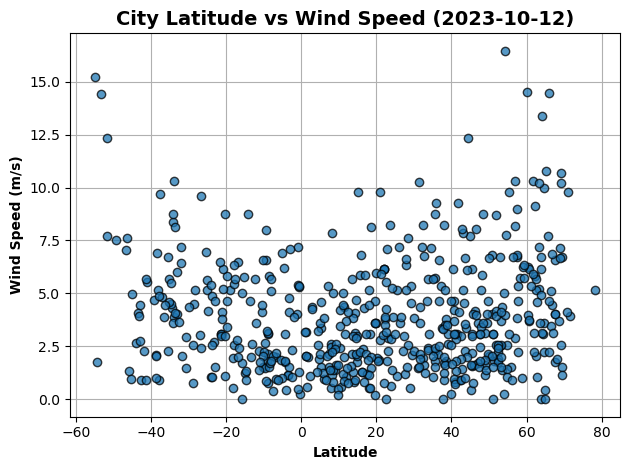

In [12]:
# Build the scatter plots for latitude vs. wind speed
fig, ax = plt.subplots()

this_scatter(
    x_col='Lat',
    y_col='Wind Speed',
    df=city_data_df,
    xlabel='Latitude',
    ylabel='Wind Speed (m/s)',
    title='City Latitude vs Wind Speed',
    ax=ax
)

# Save the figure
fig.savefig('output_data/Fig04.png')

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def this_linregress(x_col, y_col, df, xlabel, ylabel, title, file_name):

    # Define x and y values
    x_values = df[x_col]
    y_values = df[y_col]

    # Calculate the linear regression model
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


    fig, ax = plt.subplots()
    # plot points as scatterplot
    this_scatter(
        x_col=x_col,
        y_col=y_col,
        df=df,
        xlabel=xlabel,
        ylabel=ylabel,
        title=title,
        ax=ax
    )
    # Add the linear regression line
    plt.plot(
        x_values,
        regress_values,
        '-',
        color='darkred',
        label='Linear regression line'
    )

    plt.annotate(
        text=line_eq,
        xy=(.2,.3),
        xycoords='figure fraction',
        fontsize=12,
        color='darkred',
        backgroundcolor=(1, 1, 1, 0.5)
    )
    # Print r-value
    print(f"The r-value is: {rvalue}")
    print(f"The r2-value is: {rvalue**2}")
    print(f"The p-value is: {pvalue}")

    # Add a text label with the r-value
    plt.annotate(
        text=f"r-value: {rvalue:.2f}",
        xy=(.2,.25),
        xycoords='figure fraction',
        fontstyle='italic',
        fontsize=10,
        backgroundcolor=(1, 1, 1, 0.5)
    )
    
    # Add legend
    plt.legend(loc='lower left')

    # Save the figure
    fig.savefig(f'output_data/{file_name}.png')

    plt.show()
    
    


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.copy().loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,brookings,44.3114,-96.7984,7.28,97,100,12.35,US,1697147544
3,ribeira grande,38.5167,-28.7000,19.32,84,67,1.79,PT,1697147687
4,thompson,55.7435,-97.8558,13.09,58,40,1.54,CA,1697147482
5,georgetown,5.4112,100.3354,26.96,92,20,1.54,MY,1697147687
6,tazovsky,67.4667,78.7000,0.42,98,100,1.75,RU,1697147491


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.copy().loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.01,75,60,2.68,NZ,1697147687
2,adamstown,-25.0660,-130.1015,20.91,69,98,5.65,PN,1697146870
7,margaret river,-33.9500,115.0667,9.84,87,6,3.89,AU,1697147687
8,nuku'alofa,-21.1333,-175.2000,24.19,69,20,4.12,TO,1697147687
10,port-aux-francais,-49.3500,70.2167,2.37,79,82,7.52,TF,1697147687


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8687846781652357
The r2-value is: 0.7547868170146722
The p-value is: 4.245236505837709e-121


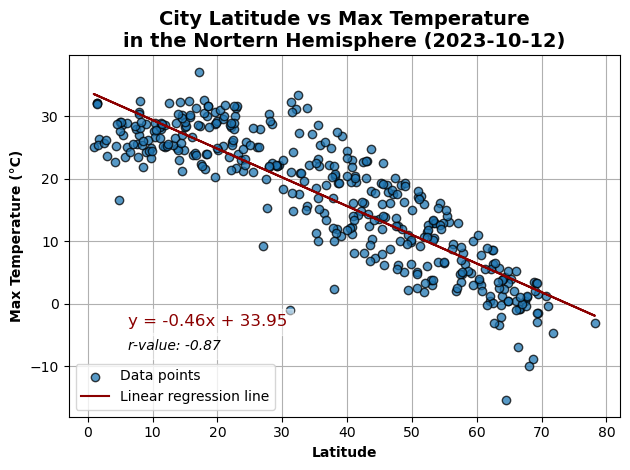

In [16]:
# Linear regression on Northern Hemisphere
this_linregress(
    x_col='Lat',
    y_col='Max Temp',
    df=northern_hemi_df,
    xlabel='Latitude',
    ylabel='Max Temperature (°C)',
    title='City Latitude vs Max Temperature\nin the Nortern Hemisphere',
    file_name='Fig05'
)


The r-value is: 0.8518634212076555
The r2-value is: 0.7256712883916114
The p-value is: 4.699967205878284e-49


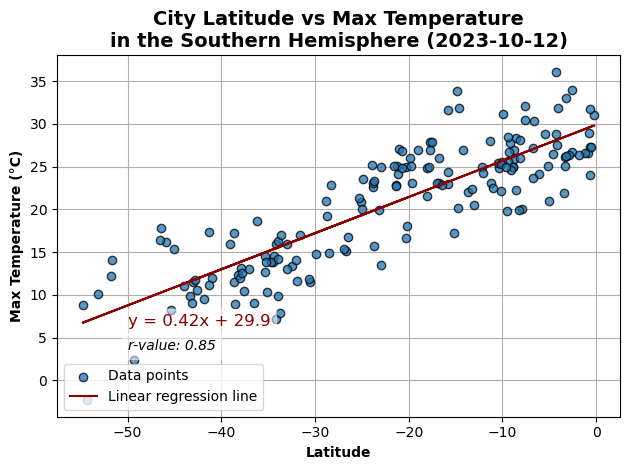

In [17]:
# Linear regression on Southern Hemisphere
this_linregress(
    x_col='Lat',
    y_col='Max Temp',
    df=southern_hemi_df,
    xlabel='Latitude',
    ylabel='Max Temperature (°C)',
    title='City Latitude vs Max Temperature\nin the Southern Hemisphere',
    file_name='Fig06'
)


**Discussion about the linear relationship:** The correlation between city latitude and maximum temperature is strong for cities in both the northern and the southern hemispheres (r values are -0.87 and 0.85, respectively). It is negative for the northern hemisphere and positive for the southern hemisphere, meaning that as distance from the equator increases, maximum temperature decreases. We can conclude that distance from the equator (i.e. the absolute value of latitude) has a strong relationship with maximum temperature. The r2 values indicate that the linear regression lines explain most of the variation observed (over 70%).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.13343583217370475
The r2-value is: 0.0178051213078891
The p-value is: 0.008161921463192213


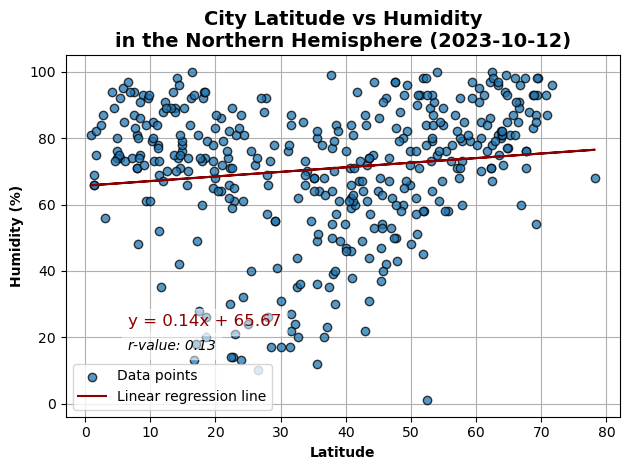

In [18]:
# Northern Hemisphere
this_linregress(
    x_col='Lat',
    y_col='Humidity',
    df=northern_hemi_df,
    xlabel='Latitude',
    ylabel='Humidity (%)',
    title='City Latitude vs Humidity\nin the Northern Hemisphere',
    file_name='Fig07'
)


The r-value is: 0.035458793451526575
The r2-value is: 0.001257326033038024
The p-value is: 0.6461914393534967


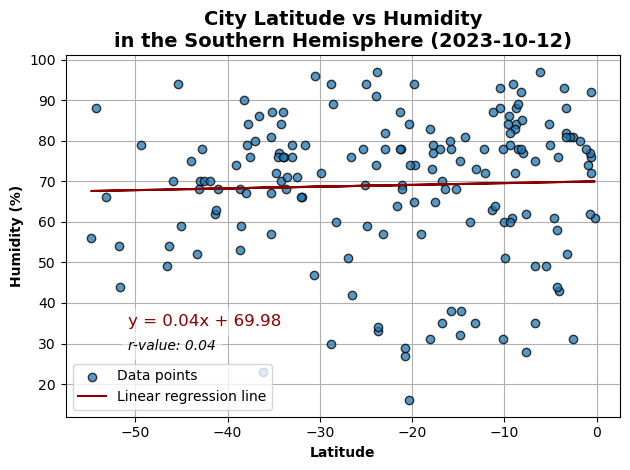

In [19]:
# Southern Hemisphere
this_linregress(
    x_col='Lat',
    y_col='Humidity',
    df=southern_hemi_df,
    xlabel='Latitude',
    ylabel='Humidity (%)',
    title='City Latitude vs Humidity\nin the Southern Hemisphere',
    file_name='Fig08'
)


**Discussion about the linear relationship:** The correlation between city latitude and humidity is very weak for cities in both the northern and the southern hemispheres (r values are 0.13 and 0.04, respectively). Both are positive, meaning that as latitude increases, humidity increases as well, but they are so close to 0 that this is negligible and the relationship is probably due to randomness. We can conclude that latitude has a very weak relationship with humidity. The r2 values indicate that the linear regression lines explain a very small percentage of the variation observed (less than 2%).

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.25232987408957325
The r2-value is: 0.0636703653580599
The p-value is: 4.147385080495409e-07


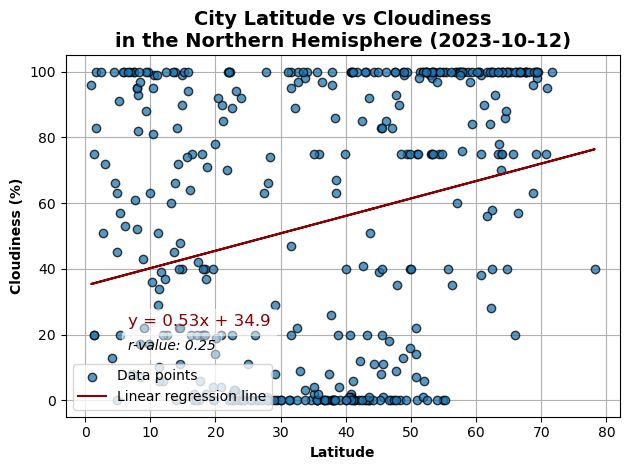

In [20]:
# Northern Hemisphere
this_linregress(
    x_col='Lat',
    y_col='Cloudiness',
    df=northern_hemi_df,
    xlabel='Latitude',
    ylabel='Cloudiness (%)',
    title='City Latitude vs Cloudiness\nin the Northern Hemisphere',
    file_name='Fig09'
)


The r-value is: 0.12606042435697198
The r2-value is: 0.015891230589059856
The p-value is: 0.10141303262970275


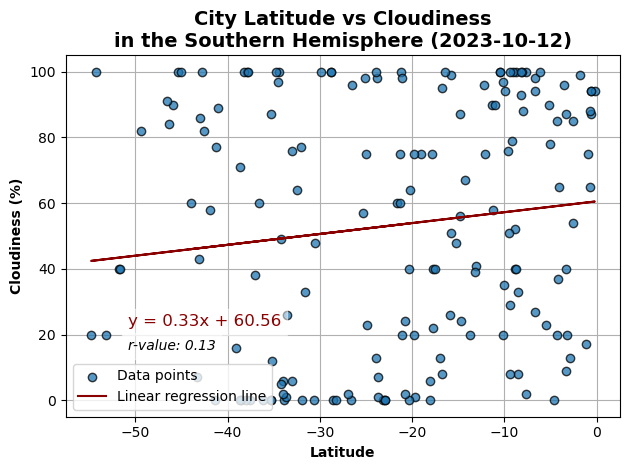

In [21]:
# Southern Hemisphere
this_linregress(
    x_col='Lat',
    y_col='Cloudiness',
    df=southern_hemi_df,
    xlabel='Latitude',
    ylabel='Cloudiness (%)',
    title='City Latitude vs Cloudiness\nin the Southern Hemisphere',
    file_name='Fig10'
)


**Discussion about the linear relationship:** The correlation between city latitude and cloudiness is very weak for cities in both the northern and the southern hemispheres (r values are 0.25 and 0.13, respectively). Both are positive, meaning that as latitude increases, cloudiness increases as well. We can conclude that latitude has a very weak relationship with cloudiness that is very possibly due to randomness. The r2 values indicate that the linear regression lines explain a very small percentage of the variation observed (less than 7%).

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.2946280657779803
The r2-value is: 0.08680569714407388
The p-value is: 2.727181030599736e-09


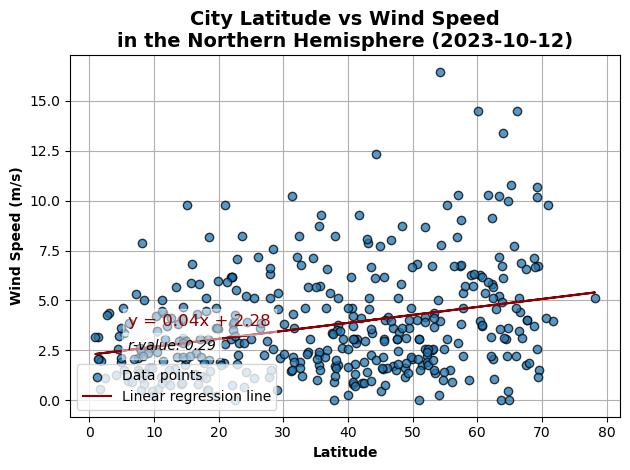

In [22]:
# Northern Hemisphere
this_linregress(
    x_col='Lat',
    y_col='Wind Speed',
    df=northern_hemi_df,
    xlabel='Latitude',
    ylabel='Wind Speed (m/s)',
    title='City Latitude vs Wind Speed\nin the Northern Hemisphere',
    file_name='Fig11'
)


The r-value is: -0.355637520982975
The r2-value is: 0.126478046330916
The p-value is: 1.9430454988520105e-06


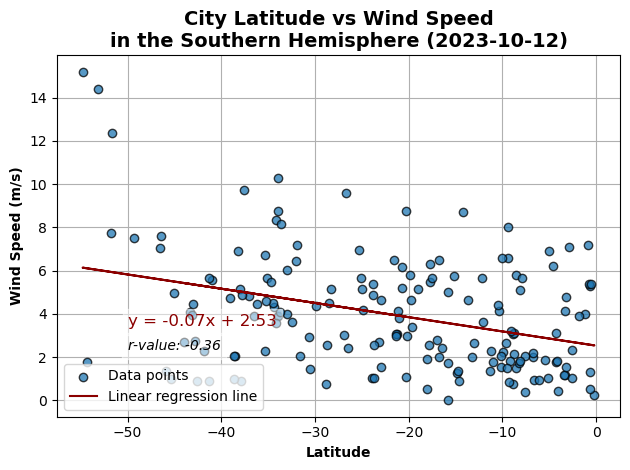

In [23]:
# Southern Hemisphere
this_linregress(
    x_col='Lat',
    y_col='Wind Speed',
    df=southern_hemi_df,
    xlabel='Latitude',
    ylabel='Wind Speed (m/s)',
    title='City Latitude vs Wind Speed\nin the Southern Hemisphere',
    file_name='Fig12'
)


**Discussion about the linear relationship:** The correlation between city latitude and wind speed is very weak for cities in the northern hemisphere and weak for cities in the southern hemispheres (r values are 0.29 and -0.36, respectively). It is positive for the northern hemisphere and negative for the southern hemisphere, meaning that as distance from the equator increases, wind speed increases as well. We can conclude that distance from the equator (i.e. the absolute value of latitude) has a weak relationship with wind speed that might be due to randomness. The r2 values indicate that the linear regression lines explain a very small percentage of the variation observed (less than 15%).